In [2]:
import numpy as np
import pandas as pd
from pyDOE import lhs
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
component_names = ['DIW','SLES','ASSA','SRBTL','SDCL','NAOH','PRFLS','PWDGRN']
min_constraints = np.array([0.75,0.045,0.055,0.010,0.005,0.005,0.0001,0.0010]) 
max_constraints = np.array([0.85,0.075,0.095,0.035,0.030,0.007,0.0010,0.0020]) 

In [4]:
num_components = len(component_names)
num_experiments = 20

In [5]:
# design as latin hypercube and sum to 1 due to mixture
design = lhs(num_components, samples=num_experiments)
scaled_design = min_constraints + (max_constraints - min_constraints) * design

In [6]:
normalized_design = scaled_design / scaled_design.sum(axis=1)[:, None]

In [7]:
# Create design matrix considering constraints
valid_design = []
for row in normalized_design:
    if np.all(row >= min_constraints) and np.all(row <= max_constraints):
        valid_design.append(row)

In [8]:
df = pd.DataFrame(valid_design, columns=component_names)
df.to_excel('dwl_mixture_design.xlsx', index=False)

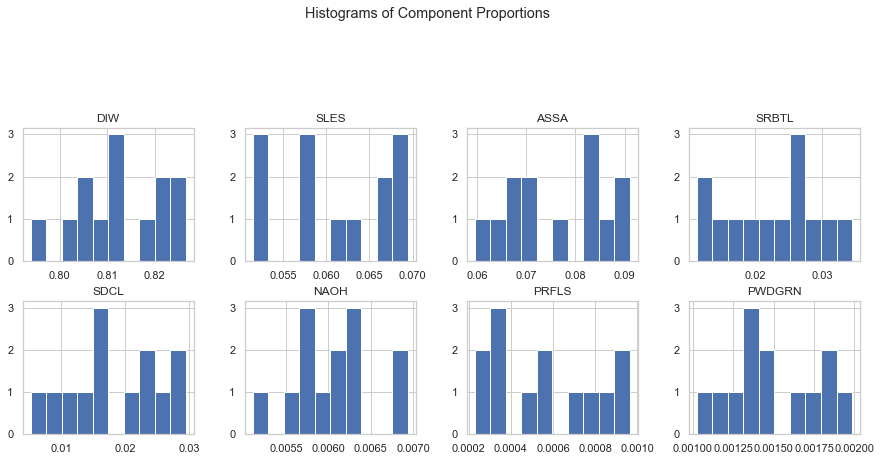

In [11]:
sns.set(style="whitegrid")
# ndf = df.drop(columns=["Ex"])

df.hist(bins=10, figsize=(15, 12), layout=(4, 4))
plt.suptitle('Histograms of Component Proportions', y=1.02)
plt.show()
